# Stock Price Forecasting (Time Series Forcasting)

## Thumb Rule in Time series Forcasting

- Durbin watson value should be either less than 1.5 or more than 2.5
- There must be date and time column
- Date column should be in sequence order
- There should not be any missing data - imputation method
- check whether we have trend, seasonality, cyclical and random noise - decomposition method
- Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)
- Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
from pandas import Series
from datetime import datetime
from numpy import log

In [188]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\STOCK PRICE PREDICTION\datasets_302666_618181_AAPL.csv')

In [189]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [190]:
df.shape

(251, 7)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [192]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.856972,194.944861,190.895657,192.941913,191.111984,3.289967e+07
std,21.787330,21.956082,21.707333,21.777356,21.369348,1.385336e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.329740e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.985580e+07
75%,209.055000,210.690002,207.154998,208.904999,207.760621,3.927970e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


## Check data valid or not

- in a year 365 or 366 days
- stock price prediction not on SAT-SUN (only on MON to FRI)
- total weekend (SAT - SUN) in a year => 52 or 53 
- 52 * 2 => 104 SAT & SUN
- 365 - 104 => 261 MON to FRI
- out of 261 days some are goverment holidays (independent day) or festival holidays 
- we have Apple company dataset so we need to consider US Calender (US Bussiness Day)


In [193]:
df.shape

(251, 7)

- from 2018 - 2019 (one year)
- 251 days

In [194]:
from pandas.tseries.offsets import BDay

## Selecting the data column and predicted column

In [195]:
df_date = df[['Date' , 'Volume']]

In [196]:
df_date.head(1)

,Date,Volume
0,8/15/2018,28807600


In [197]:
df_date.tail()

,Date,Volume
246,8/8/2019,27009500
247,8/9/2019,24619700
248,8/12/2019,22474900
249,8/13/2019,47218500
250,8/14/2019,36453100


## calculate the date without SAT , SUN

In [198]:
date1 = pd.date_range(start='8/15/2018' , end='8/14/2019' ,freq=BDay())
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [199]:
len(date1)

261

- 261 days only excluding sat-sun 
- original dataset has 251, so may be there is 10 holidays (between 2018 to 2019)

## Now we calculate data with excluding SAT,SUN & Holidays
- Holidays according to US Calender

In [200]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [201]:
US_BusinessDay = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [202]:
date2 = pd.date_range(start='8/15/2018' , end='8/14/2019' ,freq=US_BusinessDay)
date2

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [203]:
len(date2)

251

- Original dataset also has 251 days 
- Data is Correct

## Add Time Stamp into data
- OR
- we can convert Date column object from datetime64 using
- df_date['Date'] = pd.to_datetime(df_date['Date'])

In [204]:
df_date['Time_Stamp'] = pd.DataFrame(date2)

In [205]:
df_date.head()

,Date,Volume,Time_Stamp
0,8/15/2018,28807600,2018-08-15
1,8/16/2018,28500400,2018-08-16
2,8/17/2018,35427000,2018-08-17
3,8/20/2018,30287700,2018-08-20
4,8/21/2018,26159800,2018-08-21


In [206]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    object        
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.0+ KB


## Missing Data

In [207]:
df_date.isnull().sum()

Date          0
Volume        0
Time_Stamp    0
dtype: int64

## Durbin Watson Test
- Durbin watson value should be either less than 1.5 or more than 2.5

In [208]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

- its less then 1.5, so its time series forecasting problem

## Observation 
- Durbin watson value should be either less than 1.5 or more than 2.5 => Satisfied
- There must be date and time column => Satisfied
- Date column should be in sequence order   => Satisfied
- There should not be any missing data => Satisfied
- Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)  => Satisfied

## Decomposition Method

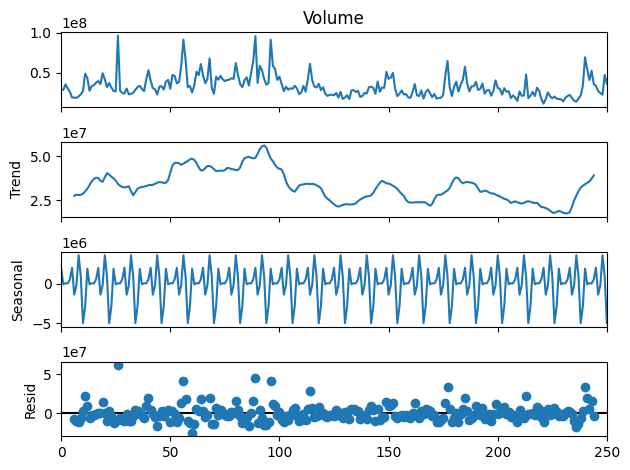

In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition  = seasonal_decompose(df_date['Volume'] , period=12)
decomposition.plot()
plt.show()

## Observation 
- Trend => Upwoard and Downwoard both trend are there 
- Seasonality is there 
- Lots of random noice(Resid) in daset

## Date ploted aginst Volume

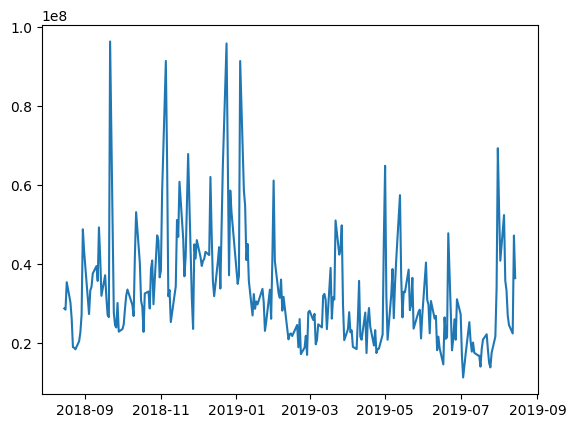

In [210]:
plt.plot(df_date['Time_Stamp'] , df_date['Volume'] )
plt.show()

### Observation
- sept 2018 to sept 2019 
- data is keep fluctuating (Seasonality is there)

## Convert Dataset inot index format (index = date)

In [211]:
df_final = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\STOCK PRICE PREDICTION\datasets_302666_618181_AAPL.csv' , parse_dates=True , index_col=0)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


- OR we can do 
- df_date.index = df_date['Time_Stamp']

## Boxplot Year wise for Open

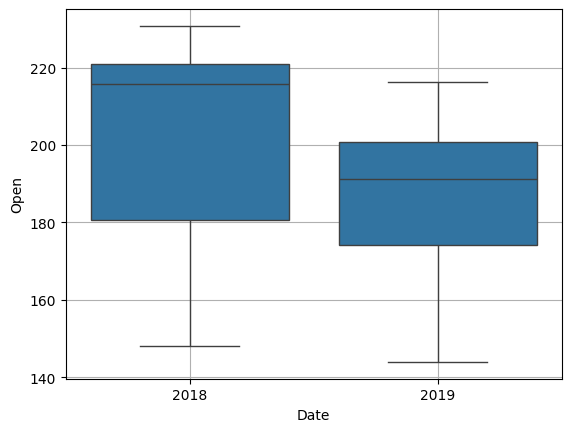

In [212]:
sns.boxplot(x=df_final.index.year ,y=df_final['Open'])
plt.grid()

### Observation 
- maximum flucation is in 2018
- 2019 is stable so we buy the stock
- 2018 is a year where we sell the stock (Median is high)

## Boxplot Year wise for Volume

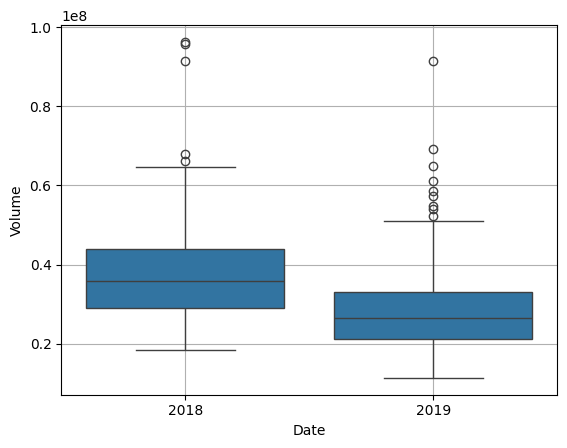

In [213]:
sns.boxplot(x=df_final.index.year ,y=df_final['Volume'])
plt.grid()

## Boxplot month wise for Open

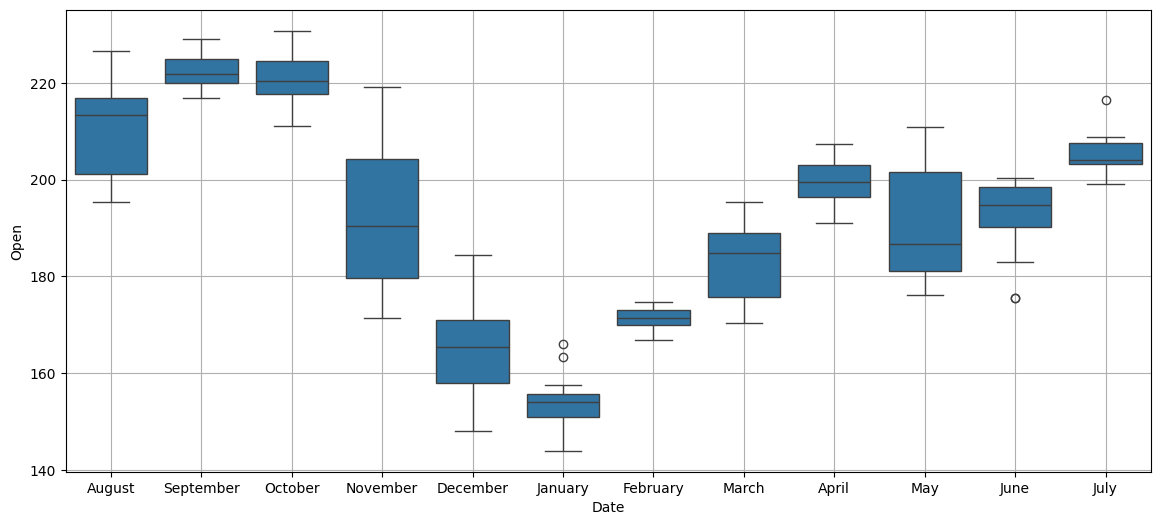

In [214]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_final.index.month_name()  , y=df_final['Open'])
plt.grid()

### Observation
- Buying => May , Dec, Feb, Oct , Setp
- Selling => Jan , June , July , Aug , March

## Boxplot month wise Treading 
- for Volume

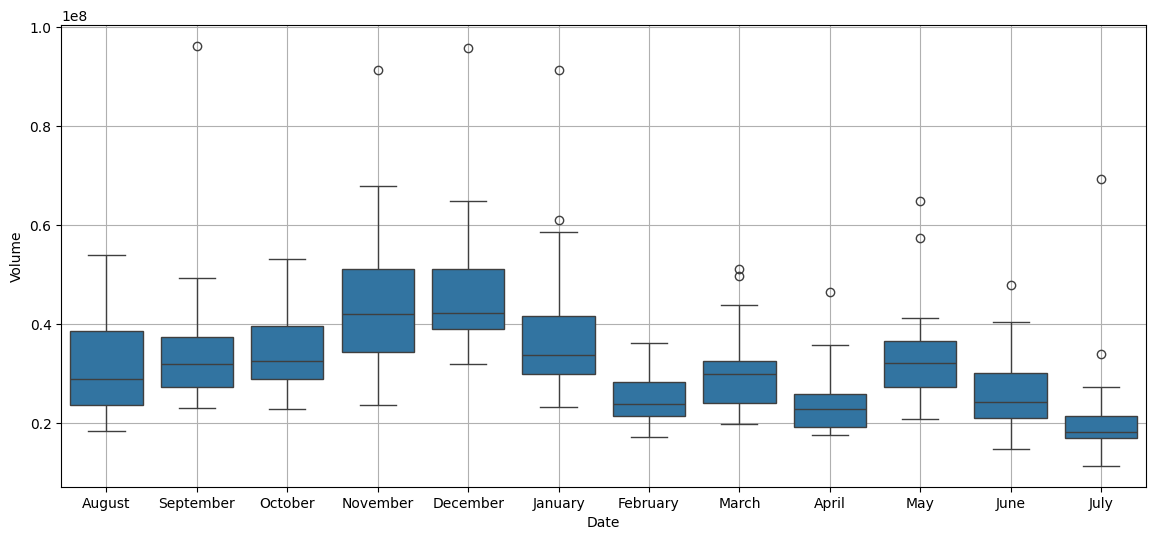

In [215]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_final.index.month_name()  , y=df_final['Volume'])
plt.grid()

## Create Month & Year column

In [216]:
df_final['Month'] = df_final.index.month
df_final['Year'] = df_final.index.year


In [217]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018


In [218]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [219]:
df_final_model['Date'] = pd.to_datetime(df_final_model['Date'])
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


## Split the data into Train and test
- WE split the data in sequencial manner 
- 200 days training (80% of 251)
- 51 days Testing (20% of 251)

In [220]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-04')]
train.shape

(200, 7)

In [221]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-04')]
test.shape

(51, 7)

## Predict Volume

In [222]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [223]:
train_final.head()

,Volume
Time_Stamp,
2018-08-15,28807600
2018-08-16,28500400
2018-08-17,35427000
2018-08-20,30287700
2018-08-21,26159800


In [224]:
test_final.head()

,Volume
Time_Stamp,
2019-06-04,30968000
2019-06-05,29773400
2019-06-06,22526300
2019-06-07,30684400
2019-06-10,26220900


## Facebook Prophet Model
- Automation 

In [225]:
from prophet import Prophet
model = Prophet()

- we need rename datetime column as Ds
- we need rename Prediction column as Y

In [226]:
df_final_model_1 = df_final_model[['Date','Volume']]
df_final_model_1.columns = ['ds' , 'y']
df_final_model_1.head()

,ds,y
Time_Stamp,,
2018-08-15,2018-08-15,28807600
2018-08-16,2018-08-16,28500400
2018-08-17,2018-08-17,35427000
2018-08-20,2018-08-20,30287700
2018-08-21,2018-08-21,26159800


In [227]:
df_final_model_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


In [228]:
model.fit(df_final_model_1)

12:01:43 - cmdstanpy - INFO - Chain [1] start processing
12:01:43 - cmdstanpy - INFO - Chain [1] done processing


In [229]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## create futrue data for prediction 

In [230]:
future_date = model.make_future_dataframe(periods=365)
future_date.tail()

,ds
611,2020-08-09
612,2020-08-10
613,2020-08-11
614,2020-08-12
615,2020-08-13


## Prediction 

In [231]:
predict = model.predict(future_date)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.948911e+07,5.279394e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,1.847166e+07,5.278641e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07
2,2018-08-17,3.520538e+07,2.199784e+07,5.445031e+07,3.520538e+07,3.520538e+07,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,3.822372e+07
3,2018-08-20,3.524315e+07,2.053195e+07,5.357631e+07,3.524315e+07,3.524315e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,3.667853e+07
4,2018-08-21,3.525575e+07,1.988331e+07,5.199482e+07,3.525575e+07,3.525575e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,3.550325e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2020-08-09,5.662651e+06,-1.427452e+07,1.999085e+07,8.987447e+05,1.011649e+07,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,0.0,0.0,0.0,2.469718e+06
612,2020-08-10,5.612907e+06,-9.696365e+06,2.423261e+07,8.210165e+05,1.008773e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,7.048280e+06
613,2020-08-11,5.563163e+06,-1.099506e+07,2.267836e+07,7.501784e+05,1.006829e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,5.810670e+06
614,2020-08-12,5.513419e+06,-1.029298e+07,2.389178e+07,6.838345e+05,1.004812e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,6.090871e+06


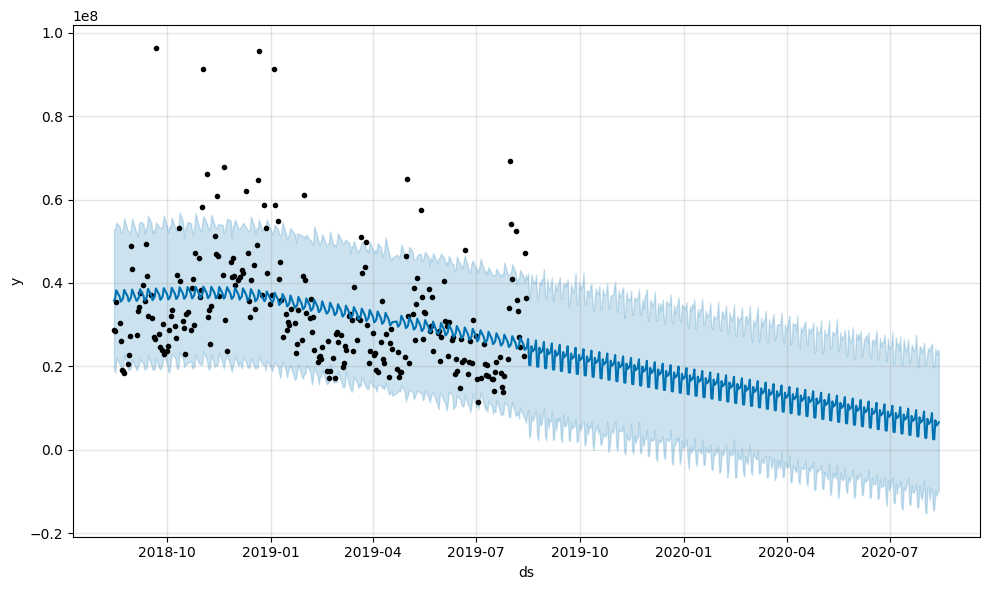

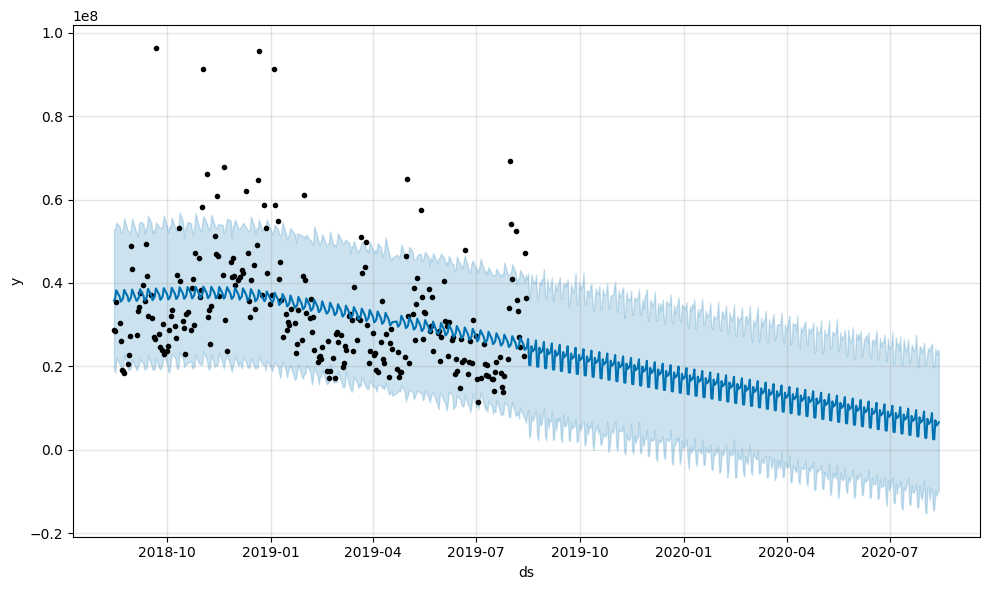

In [232]:
model.plot(predict)

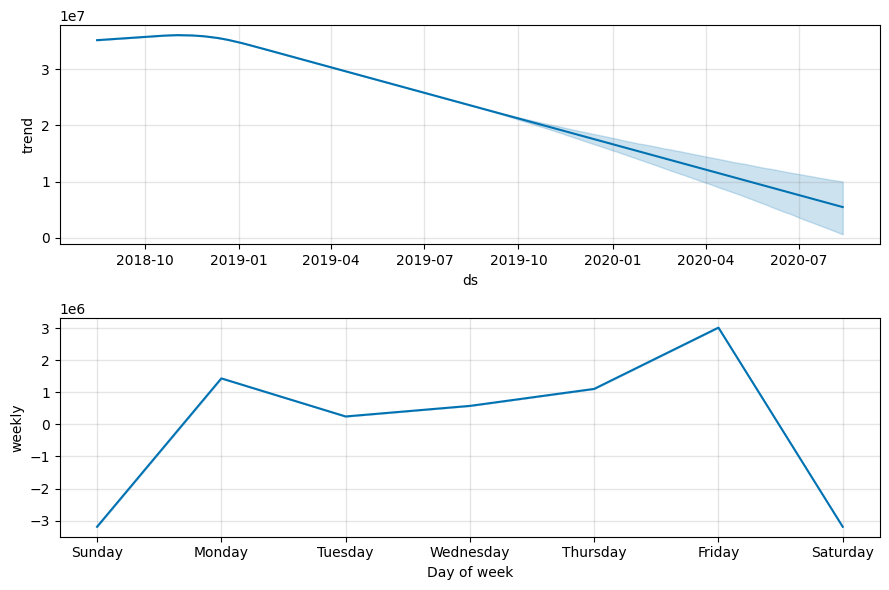

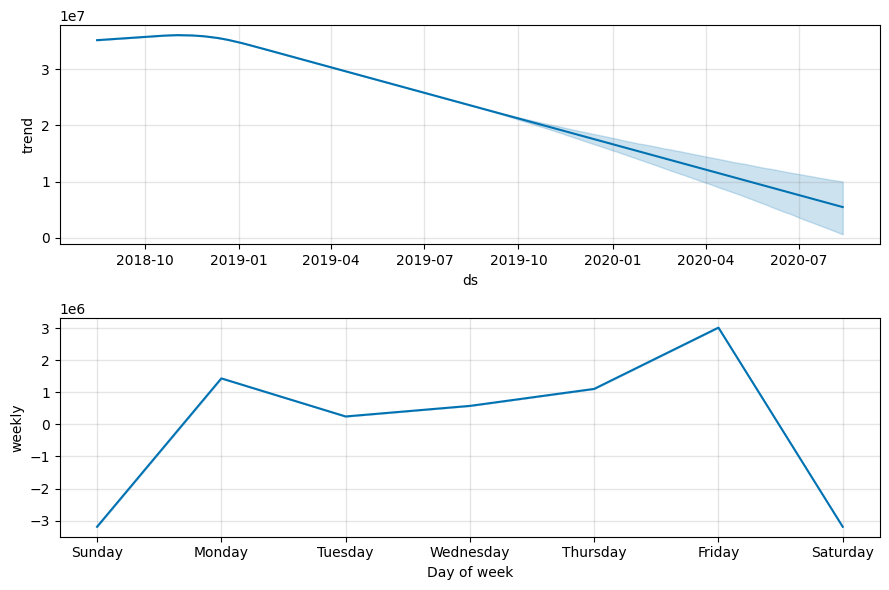

In [233]:
model.plot_components(predict)

## Real time Dataset (Reliance Chemotex Industries Limited (INE750D01016))

In [234]:
new_data = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\STOCK PRICE PREDICTION\Quote-Equity-RELCHEMQ-EQ-27-03-2024-to-27-03-2025.csv')

In [235]:
new_data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,27-Mar-2025,EQ,158.39,160.00,154.56,157.64,157.0,158.31,157.30,260.0,146.51,"27,442","43,16,605.65",495
1,26-Mar-2025,EQ,160.40,160.40,156.31,159.63,157.1,157.64,157.73,260.0,146.51,"15,389","24,27,231.19",364
2,25-Mar-2025,EQ,160.00,164.90,159.00,160.20,159.0,159.63,161.48,260.0,146.51,"30,216","48,79,289.59",685
3,24-Mar-2025,EQ,160.37,166.00,159.20,160.37,159.2,160.20,162.38,260.0,146.51,"11,828","19,20,663.42",916
4,21-Mar-2025,EQ,163.00,163.49,159.10,161.09,159.8,160.37,160.91,260.0,146.51,"14,942","24,04,387.61",401


In [236]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           250 non-null    object 
 1   series         250 non-null    object 
 2   OPEN           250 non-null    float64
 3   HIGH           250 non-null    float64
 4   LOW            250 non-null    float64
 5   PREV. CLOSE    250 non-null    float64
 6   ltp            250 non-null    float64
 7   close          250 non-null    float64
 8   vwap           250 non-null    float64
 9   52W H          250 non-null    float64
 10  52W L          250 non-null    float64
 11  VOLUME         250 non-null    object 
 12  VALUE          250 non-null    object 
 13  No of trades   250 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.5+ KB


## Convert date into datetime format

In [237]:
new_data.columns = new_data.columns.str.strip()

In [238]:
new_data['Date']  = pd.to_datetime(new_data['Date'])

In [239]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          250 non-null    datetime64[ns]
 1   series        250 non-null    object        
 2   OPEN          250 non-null    float64       
 3   HIGH          250 non-null    float64       
 4   LOW           250 non-null    float64       
 5   PREV. CLOSE   250 non-null    float64       
 6   ltp           250 non-null    float64       
 7   close         250 non-null    float64       
 8   vwap          250 non-null    float64       
 9   52W H         250 non-null    float64       
 10  52W L         250 non-null    float64       
 11  VOLUME        250 non-null    object        
 12  VALUE         250 non-null    object        
 13  No of trades  250 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 27.5+ KB


## predicting Open 

In [240]:
new_data = new_data[['Date' , 'OPEN']]
new_data.columns = ['ds' , 'y']

In [241]:
new_data.head()

,ds,y
0,2025-03-27,158.39
1,2025-03-26,160.40
2,2025-03-25,160.00
3,2025-03-24,160.37
4,2025-03-21,163.00


## Model Building

In [242]:
model = Prophet()

In [243]:
model.fit(new_data)

12:04:31 - cmdstanpy - INFO - Chain [1] start processing
12:04:31 - cmdstanpy - INFO - Chain [1] done processing


In [248]:
future_date = model.make_future_dataframe(periods=100)
future_date.tail()

,ds
345,2025-07-01
346,2025-07-02
347,2025-07-03
348,2025-07-04
349,2025-07-05


## Predictions

In [260]:
predict = model.predict(future_date)
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-03-27,214.082924,202.557592,225.863675
1,2024-03-28,216.190091,203.871600,228.095020
2,2024-04-01,217.449415,205.447930,229.555611
3,2024-04-02,216.050125,204.873047,227.421551
4,2024-04-03,214.527440,203.627262,226.535195
...,...,...,...,...
345,2025-07-01,89.216874,73.001982,106.034430
346,2025-07-02,86.952655,69.326130,102.972180
347,2025-07-03,88.318287,71.203804,104.800707
348,2025-07-04,88.573137,72.029468,105.044062


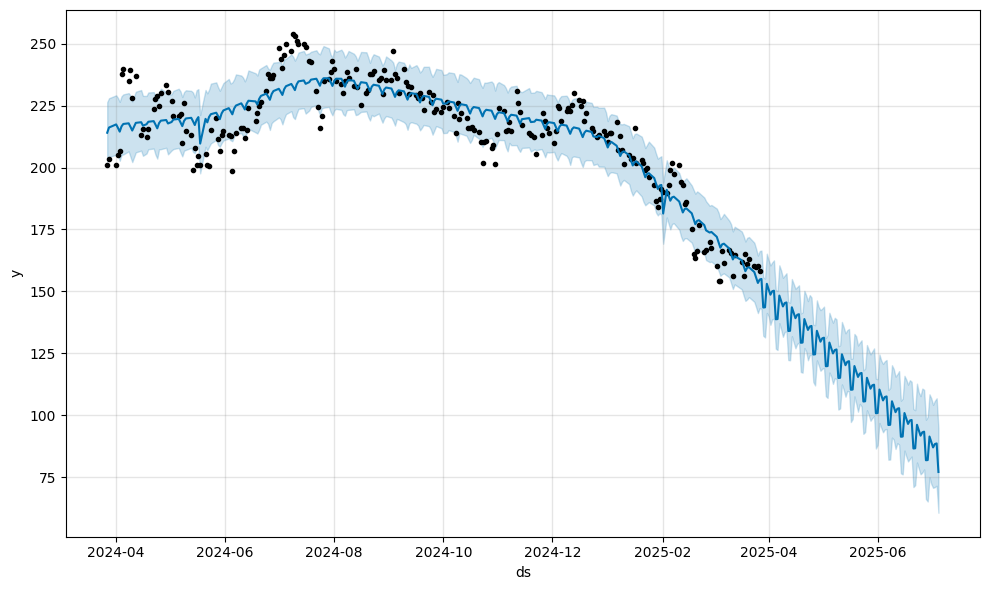

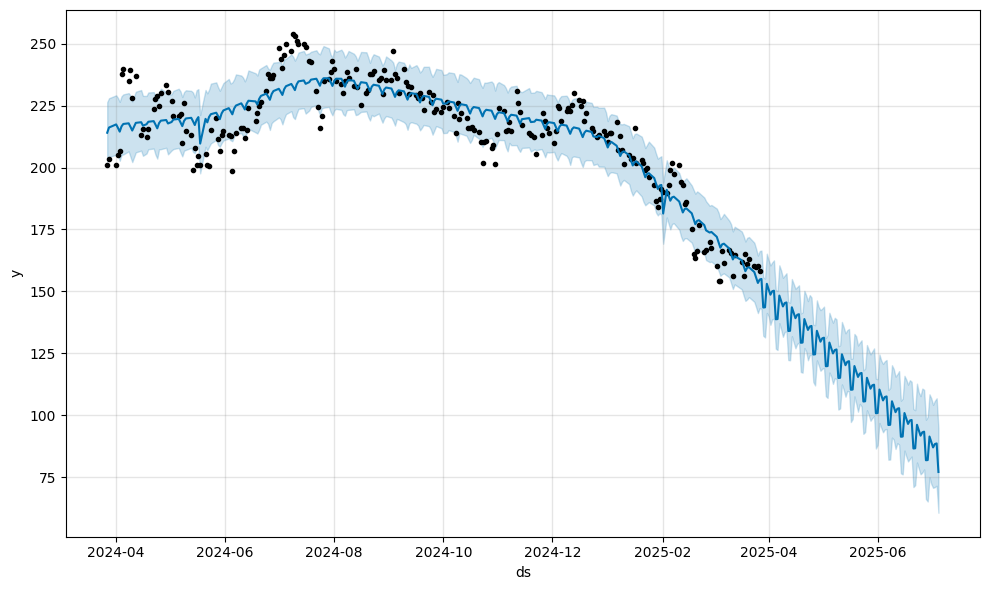

In [250]:
model.plot(predict)

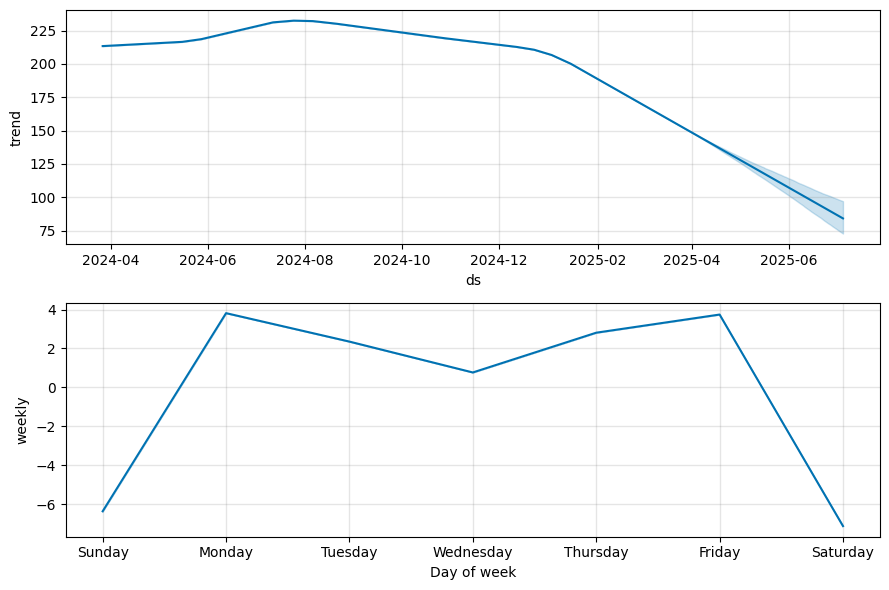

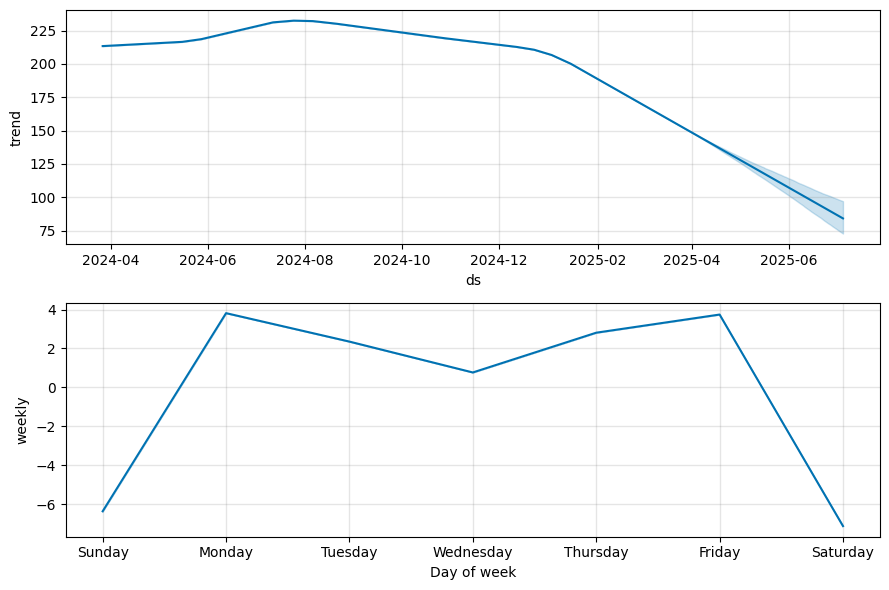

In [251]:
model.plot_components(predict)

## Evaluation Matrix

In [254]:
from prophet.diagnostics import performance_metrics, cross_validation

In [255]:
df_cv = cross_validation(model, initial='200 days', period = '10 days', horizon='100 days')

  0%|          | 0/7 [00:00<?, ?it/s]

12:13:36 - cmdstanpy - INFO - Chain [1] start processing
12:13:36 - cmdstanpy - INFO - Chain [1] done processing
12:13:36 - cmdstanpy - INFO - Chain [1] start processing
12:13:36 - cmdstanpy - INFO - Chain [1] done processing
12:13:36 - cmdstanpy - INFO - Chain [1] start processing
12:13:36 - cmdstanpy - INFO - Chain [1] done processing
12:13:36 - cmdstanpy - INFO - Chain [1] start processing
12:13:36 - cmdstanpy - INFO - Chain [1] done processing
12:13:37 - cmdstanpy - INFO - Chain [1] start processing
12:13:37 - cmdstanpy - INFO - Chain [1] done processing
12:13:37 - cmdstanpy - INFO - Chain [1] start processing
12:13:37 - cmdstanpy - INFO - Chain [1] done processing
12:13:37 - cmdstanpy - INFO - Chain [1] start processing
12:13:37 - cmdstanpy - INFO - Chain [1] done processing


In [256]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,11 days,107.098704,10.348850,8.778581,0.039992,0.038831,0.040697,0.666667
1,12 days,112.849004,10.623041,9.206318,0.042010,0.041918,0.042722,0.625000
2,13 days,116.733186,10.804313,9.426943,0.042983,0.043006,0.043746,0.598958
3,14 days,120.509209,10.977669,9.518111,0.043361,0.041918,0.044190,0.612500
4,15 days,119.060151,10.911469,9.304656,0.042280,0.040044,0.043186,0.633333
...,...,...,...,...,...,...,...,...
85,96 days,658.254346,25.656468,21.160621,0.123962,0.093027,0.115264,0.567708
86,97 days,715.805719,26.754546,22.107595,0.130110,0.093092,0.120386,0.545833
87,98 days,769.914690,27.747337,22.843527,0.135108,0.105773,0.124434,0.529167
88,99 days,803.309913,28.342722,23.342749,0.138528,0.125473,0.127286,0.533333


## Observation 
- Check mape (Mean Absolute percent error)
- <10 highly accepted forcasting
- 10-20  good accepted forcasting
- 20-50  reasonable forcasting
- '> 50  inacceptable  forcasting

In [264]:
pred = predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
pred = pred[pred['ds']>= pd.to_datetime('2025-04-01')]
pred.head()

,ds,yhat,yhat_lower,yhat_upper
254,2025-04-01,150.917776,138.563249,163.089900
255,2025-04-02,148.653557,136.754449,160.959731
256,2025-04-03,150.019189,138.002560,162.499864
257,2025-04-04,150.274039,138.615559,163.118547
258,2025-04-05,138.724177,127.344020,150.603903
